<p style="text-align: center; font-size: 28px;"><b>Principal Component Analysis</b></p>

# What is PCA?

Principal Component Analysis (PCA) is a dimensionality reduction technique used in Machine Learning to simplify datasets while retaining as much information as possible. It transforms original features into a smaller set of new variables (principal components) that capture the most important patterns in the data.

---

**Why use PCA?**

- Many models benefit from well-structured input features.
- With few features, correlations are easy to spot (e.g., between height and weight).
- With many features (10, 20, or more), visualization and computation become complex.
- PCA reduces features into fewer, more informative components without losing key information.

---

**Example Dataset: Pizza Stores**

We use a synthetic dataset about pizza stores with the following columns:

- revenue  
- total_customers  
- amt_flour  
- amt_tomatoes  
- amt_cheese  

Each row represents a store, containing inventory and sales data.

---

**Variance and Information**

- **Variance** measures how spread out the data is.  
- A feature with no variance (e.g., `total_customers = 500` in every row) provides no additional value.  
- Features with higher variance usually carry more information.  

# The Math Behind PCA

Principal Component Analysis (PCA) is about transforming a dataset with many features into a smaller set of new features while retaining as much useful information as possible. This involves several mathematical steps: forming a data matrix, computing a covariance matrix, performing matrix factorization, and extracting eigenvalues and eigenvectors. Let’s go step by step.

---

**Step 1: Data Matrix**

A **data matrix** is simply the dataset organized into rows (observations) and columns (features). For example, our pizza dataset includes 5 features:

| revenue   | total_customers | amt_flour | amt_tomatoes | amt_cheese |
|-----------|-----------------|-----------|--------------|------------|
| 9931.86   | 615.34          | 37.66     | 174.10       | 139.40     |
| 12397.79  | 725.44          | 44.42     | 239.12       | 168.42     |
| 11983.07  | 630.99          | 40.26     | 224.08       | 146.61     |
| 13910.98  | 746.26          | 43.63     | 227.09       | 170.73     |
| 13083.85  | 689.06          | 48.96     | 221.38       | 154.79     |

Each row represents a store; each column is a feature describing performance.

---

**Step 2: Covariance Matrix**

The **covariance matrix** shows how much each pair of features vary together. The covariance between two features \(X\) and \(Y\) is:

$$
\text{Cov}(X, Y) = \frac{1}{n-1} \sum_{i=1}^n (X_i - \bar{X})(Y_i - \bar{Y})
$$

- If covariance is positive, the features increase together.  
- If negative, one decreases while the other increases.  
- The diagonal entries are simply the variances of each feature.

For five features \(a, b, c, d, e\), the covariance matrix looks like:

$$
\begin{bmatrix}
\text{Cov}(a,a) & \text{Cov}(a,b) & \text{Cov}(a,c) & \text{Cov}(a,d) & \text{Cov}(a,e) \\
\text{Cov}(b,a) & \text{Cov}(b,b) & \text{Cov}(b,c) & \text{Cov}(b,d) & \text{Cov}(b,e) \\
\text{Cov}(c,a) & \text{Cov}(c,b) & \text{Cov}(c,c) & \text{Cov}(c,d) & \text{Cov}(c,e) \\
\text{Cov}(d,a) & \text{Cov}(d,b) & \text{Cov}(d,c) & \text{Cov}(d,d) & \text{Cov}(d,e) \\
\text{Cov}(e,a) & \text{Cov}(e,b) & \text{Cov}(e,c) & \text{Cov}(e,d) & \text{Cov}(e,e) \\
\end{bmatrix}
$$

For our pizza dataset, Pandas computes:

|               | revenue     | total_customers | amt_flour | amt_tomatoes | amt_cheese |
|---------------|-------------|-----------------|-----------|--------------|------------|
| revenue       | 1.56e+06    | 31853.05        | 3713.66   | 19980.87     | 9152.57    |
| total_customers | 31853.05  | 1295.10         | 105.91    | 577.44       | 256.64     |
| amt_flour     | 3713.66     | 105.91          | 16.89     | 66.17        | 29.13      |
| amt_tomatoes  | 19980.87    | 577.44          | 66.17     | 500.72       | 162.22     |
| amt_cheese    | 9152.57     | 256.64          | 29.13     | 162.22       | 105.37     |

Notice how the **diagonal values** match the variances of each column.

---

**Step 3: Eigenvalues and Eigenvectors**

The next step is **matrix factorization**. We want to find eigenvectors and eigenvalues of the covariance matrix:

$$
\det(A - \lambda I) = 0
$$

- **Eigenvectors** define new directions (axes) in the dataset that capture the most variation.  
- **Eigenvalues** tell us how much variance is captured by each eigenvector.  

Geometrically, eigenvectors “rotate” the dataset into a new coordinate system where the axes represent maximum variance directions. The first principal component aligns with the direction of greatest variance, the second with the next, and so on.

---

**Step 4: Principal Components**

Principal components are **linear combinations** of the original features, weighted by eigenvectors. For example, the first principal component might look like:

$$
PC_1 = w_1 \cdot \text{revenue} + w_2 \cdot \text{total\_customers} + \dots + w_5 \cdot \text{amt\_cheese}
$$

These new features are uncorrelated and ranked by the variance they capture.

---

**Step 5: Dimensionality Reduction**

By selecting only the top principal components, we reduce dimensionality.  
Example: from 5 features → 2 components.

Using scikit-learn:

```python
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_array = pca.fit_transform(df)

Output:

[[-2572.65,  -37.43],
 [ -104.21,   31.55],
 [ -521.06,  -54.19],
 ...
 [ 1429.58,   -5.98],
 [-3550.23,   23.89],
 [ -481.85,  -34.15]]

**Step 6: Applications of PCA**

Data Preprocessing: Reduce computation time for ML models.

Visualization: Collapse many features into 2–3 dimensions.

Clustering: PCA itself highlights structure, sometimes used as a precursor to k-means.

Image Processing: Compress high-dimensional image data while retaining key information (e.g., eigenfaces).

In all cases, PCA provides a way to extract the most meaningful information from data while removing redundancy.

 # Introduction to Implementing PCA

Principal Component Analysis (PCA) is a method used to reduce the dimensionality of datasets while preserving as much variance (information) as possible. The idea is to transform the original features into a new set of features (principal components), ranked by how much variation they capture. By selecting only the top components, we reduce the dataset’s complexity without losing its essential information.

---

**Learning Goals**

In this lesson, we will:

- Implement PCA step-by-step using **NumPy**  
- Implement PCA with just a few lines of code using **scikit-learn**  
- Use principal components as inputs to train a **machine learning model**  
- Visualize principal components using **image data**

---

**Dataset: Dry Beans**

For the upcoming exercises, we will work with a dataset of dry beans.  
- Each bean is described by multiple numerical features.  
- The dataset categorizes beans into **seven different classes**.  

We will start by examining the features that distinguish these categories before applying PCA.


In [47]:
import pandas as pd

In [48]:
# Read the csv data as a DataFrame
df = pd.read_csv('data_folder/Dry_Bean.csv')

# Step 1: Clean the dataset by removing null or NA values
df.dropna()

# Step 2: Print the first few rows of the DataFrame 
# (this shows both numerical features and the 'Class' column)
print(df.head())

    Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0  28395    610.291       208.178117       173.888747      1.197191   
1  28734    638.018       200.524796       182.734419      1.097356   
2  29380    624.110       212.826130       175.931143      1.209713   
3  30008    645.884       210.557999       182.516516      1.153638   
4  30140    620.134       201.847882       190.279279      1.060798   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0      0.549812       28715     190.141097  0.763923  0.988856   0.958027   
1      0.411785       29172     191.272751  0.783968  0.984986   0.887034   
2      0.562727       29690     193.410904  0.778113  0.989559   0.947849   
3      0.498616       30724     195.467062  0.782681  0.976696   0.903936   
4      0.333680       30417     195.896503  0.773098  0.990893   0.984877   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  Class  
0     0.913358      0.007332  

In [49]:
# Step 3: Extract only the numerical columns by dropping the 'Class' column
# This will give us the feature matrix used for PCA
data_matrix = df.drop(columns=["Class"])

# Step 4: Keep the 'Class' column separately for labels
classes = df['Class']

# Step 5: Print the numerical feature matrix to verify
print(data_matrix)

        Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0      28395    610.291       208.178117       173.888747      1.197191   
1      28734    638.018       200.524796       182.734419      1.097356   
2      29380    624.110       212.826130       175.931143      1.209713   
3      30008    645.884       210.557999       182.516516      1.153638   
4      30140    620.134       201.847882       190.279279      1.060798   
...      ...        ...              ...              ...           ...   
13606  42097    759.696       288.721612       185.944705      1.552728   
13607  42101    757.499       281.576392       190.713136      1.476439   
13608  42139    759.321       281.539928       191.187979      1.472582   
13609  42147    763.779       283.382636       190.275731      1.489326   
13610  42159    772.237       295.142741       182.204716      1.619841   

       Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0          0.54981

In [50]:
print(classes)

0           SEKER
1           SEKER
2           SEKER
3           SEKER
4           SEKER
           ...   
13606    DERMASON
13607    DERMASON
13608    DERMASON
13609    DERMASON
13610    DERMASON
Name: Class, Length: 13611, dtype: object


# Implementing PCA in NumPy I

Principal Component Analysis (PCA) can be implemented step by step using NumPy. The main mathematical tool we use is **eigendecomposition**, which gives us eigenvalues and eigenvectors from a square matrix. In PCA, this matrix is the correlation (or covariance) matrix of the dataset.

---

**Key Concepts**

- **Eigenvalues** represent the amount of variance explained by each principal component. A larger eigenvalue means that the corresponding component captures more of the dataset’s information.  
- **Eigenvectors**, also known as principal axes, indicate the directions along which the data is rotated and projected to maximize variance. Together, they form the new coordinate system for the dataset.

---

**Implementation Workflow**

1. **Form the Correlation Matrix**  
   Since PCA focuses on variance and relationships between features, the first step is to calculate the correlation matrix of the dataset. This matrix shows how each feature relates to the others and ensures all variables are on the same scale.

2. **Perform Eigendecomposition**  
   Once we have the correlation matrix, we apply eigendecomposition to it. The result is two sets of values:  
   - Eigenvalues: numerical measures of variance captured by each principal component.  
   - Eigenvectors: transformation directions that define how to rotate the data into this new feature space.

3. **Interpret the Results**  
   - The eigenvalues are sorted from largest to smallest, showing the order of importance of the components.  
   - The eigenvectors form the mathematical basis for the principal components. By projecting the data onto these eigenvectors, we obtain new features that are uncorrelated and carry maximum variance.

---

**Takeaway**

Implementing PCA in NumPy involves building the correlation matrix, applying eigendecomposition, and interpreting the eigenvalues and eigenvectors. This process transforms the original correlated features into a new set of uncorrelated features (principal components), ordered by how much information they retain. This is the mathematical foundation for dimensionality reduction using PCA.

In [51]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

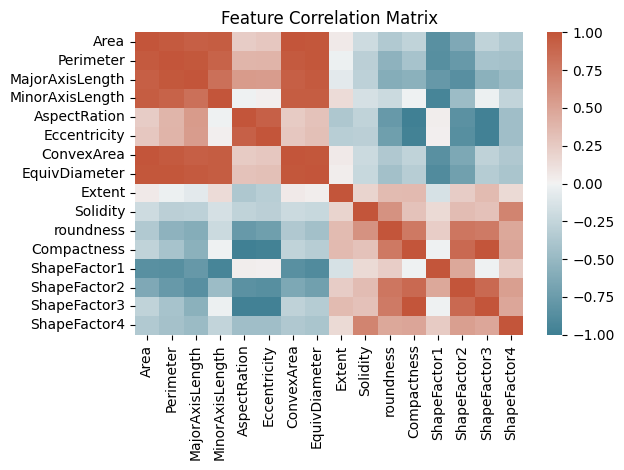

In [52]:
# ------------------------------------------------------------------------------------
# Step 1 — Correlation Matrix
# ------------------------------------------------------------------------------------
# PCA is based on variance and covariance between features. Using a *correlation* matrix
# (rather than raw covariance) puts all features on a comparable scale (unit variance),
# which is especially useful when features are measured in different units.
#
# The result is an n×n symmetric matrix (n = number of features) whose (i, j) entry
# is the correlation between feature i and feature j. The diagonal entries are all 1.
correlation_matrix = data_matrix.corr()

# Visual sanity check: pairs with high positive (≈1) or negative (≈-1) correlation
# will appear as saturated colors in this heatmap.
red_blue = sns.diverging_palette(220, 20, as_cmap=True)
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, cmap=red_blue)
plt.title("Feature Correlation Matrix")
plt.tight_layout()
plt.show()

In [53]:
# ------------------------------------------------------------------------------------
# Step 2 — Eigendecomposition of the Correlation Matrix
# ------------------------------------------------------------------------------------
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# ------------------------------------------------------------------------------------
# Step 3 — Inspect Results
# ------------------------------------------------------------------------------------
print("Number of features (n):", correlation_matrix.shape[0])
print("\nEigenvalues (length n):")
print(eigenvalues)

print("\nEigenvectors matrix shape:", eigenvectors.shape)
print("(Each column is one eigenvector v_k with length n.)")
print(eigenvectors)


Number of features (n): 16

Eigenvalues (length n):
[8.87463018e+00 4.22895571e+00 1.28105028e+00 8.18252847e-01
 4.38286865e-01 1.83961749e-01 1.11624116e-01 5.20132000e-02
 8.26026072e-03 1.45388993e-03 1.05418870e-03 2.93982938e-04
 1.48794566e-04 1.00102669e-05 1.78479175e-06 2.14611337e-06]

Eigenvectors matrix shape: (16, 16)
(Each column is one eigenvector v_k with length n.)
[[ 2.82457959e-01  2.45882017e-01 -6.14466787e-02 -3.15461931e-02
  -9.13256234e-02 -3.66390029e-01  1.25044861e-01  7.17479179e-02
   3.50665669e-02 -3.90419516e-01 -1.77686475e-01  5.44842282e-02
   4.62948861e-02  6.55727948e-01  2.31435926e-01  1.33190281e-01]
 [ 3.10891123e-01  1.79302922e-01 -1.88525952e-02 -4.24678975e-02
   8.18198663e-02 -1.02508210e-02  8.15296990e-02  3.17295058e-02
  -1.57501171e-01  3.44383066e-01  1.99453621e-01 -7.50549982e-01
   3.17920275e-01  8.13901113e-02  1.46143834e-02  1.26584691e-02]
 [ 3.25823976e-01  1.00756516e-01 -8.46919067e-02 -6.79308126e-03
  -4.42163116e-02 

**Implementing Eigendecomposition in PCA**

When applying Principal Component Analysis (PCA), one of the most important mathematical steps is performing **eigendecomposition** on the correlation (or covariance) matrix. This process gives us the **eigenvalues** and **eigenvectors**, which form the foundation of PCA.

---

**Step 1: Correlation Matrix**

- The correlation matrix is an \(n \times n\) symmetric matrix (where \(n\) is the number of features).  
- Each entry \((i, j)\) represents the correlation between feature \(i\) and feature \(j\).  
- The diagonal entries are always 1, since each feature is perfectly correlated with itself.  
- Using a correlation matrix instead of raw data ensures that all features are on the same scale, regardless of units.  

---

**Step 2: Eigendecomposition**

We solve the equation:

$$
A v_k = \lambda_k v_k
$$

where:  
- \(v_k\) is an **eigenvector** (a direction in feature space).  
- \(\lambda_k\) is the corresponding **eigenvalue** (a scalar that measures the variance captured along that direction).  

---

**Why do we get 16 eigenvalues and a 16×16 eigenvector matrix?**

- The dataset contains **16 features**, so the correlation matrix is **16×16**.  
- An \(n \times n\) matrix has up to \(n\) eigenpairs.  
- NumPy returns:
  - **Eigenvalues**: a 1D array of length \(n\) (here, 16 values). Each eigenvalue corresponds to the variance explained by one principal component.  
  - **Eigenvectors**: a 2D array of shape \((n, n)\) (here, 16×16). Each column is an eigenvector with length 16, defining the direction of one principal component in feature space.  

---

**Step 3: Interpretation for PCA**

- **Eigenvalues** tell us how much variance is captured by each principal component.  
- **Eigenvectors** define the directions (axes) along which data should be rotated to maximize variance.  
- By sorting the eigenvalues in descending order, we rank the components by importance.  
- The proportion of variance explained by a component is:

$$
\text{Explained Variance Ratio} = \frac{\lambda_k}{\sum_{i=1}^n \lambda_i}
$$

---

**Key Takeaway**

- PCA transforms correlated features into a new set of **uncorrelated principal components**.  
- Each component corresponds to an eigenvector, weighted by the variance (eigenvalue).  
- For a dataset with 16 features, we get 16 principal components, but usually keep only the top few that capture most of the variance.


# Implementing PCA in NumPy II – Analysis

Once PCA has been performed and we obtain the eigenvalues and eigenvectors, the next step is to evaluate how useful the new features (principal components) are. Since PCA reduces dimensionality, we need to decide how many components to keep without losing too much information.

---

**Step 1: Proportion of Information Explained**

- Each eigenvalue represents the amount of variance captured by its corresponding principal component.  
- To understand the contribution of each component, we calculate the **proportion of information**:

$$
\text{info\_prop}_k = \frac{\lambda_k}{\sum_{i=1}^n \lambda_i}
$$

where \(\lambda_k\) is the eigenvalue for component \(k\).  
- This tells us what percentage of total variance each principal component explains.

---

**Step 2: Scree Plot**

- A **scree plot** visualizes the information proportion per component.  
- By plotting the components on the x-axis and their variance proportion on the y-axis, we see which components dominate.  

Example interpretation:  
- The first component explains ~50% of the variance.  
- The second explains ~30%.  
- Subsequent components contribute less and less.

This shows that only the first few components capture most of the information.

---

**Step 3: Cumulative Variance Explained**

- Instead of looking at components individually, we calculate the **cumulative sum** of the proportions:

$$
\text{cum\_info\_prop}_k = \sum_{i=1}^k \text{info\_prop}_i
$$

- A **cumulative variance plot** shows how many components are needed to reach a threshold (commonly 90–95%).  
- By drawing a horizontal line at 95%, we can visually check how many components are sufficient.

---

**Step 4: Interpretation**

- In the dry beans dataset, the cumulative variance plot shows that the first **four principal components** already account for **95% of the variance**.  
- This means we can safely reduce from 16 original features down to 4 components without losing significant information.  

---

**Key Takeaway**

- Eigenvalues quantify variance captured by each component.  
- Scree plots highlight the relative importance of components.  
- Cumulative variance plots help determine the smallest number of components needed to retain most of the dataset’s information.  
- PCA allows us to reduce dimensionality (e.g., from 16 → 4 features) while keeping nearly all the original information.


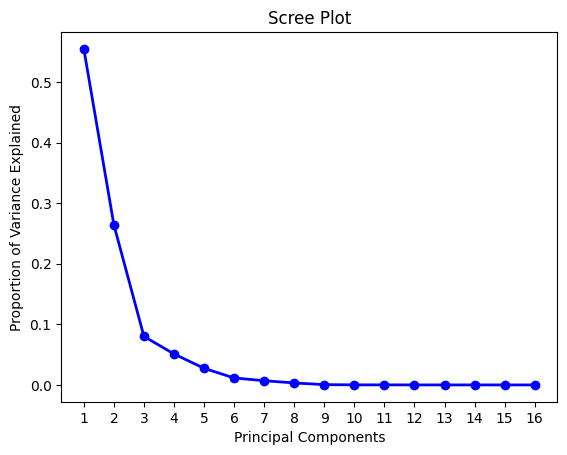

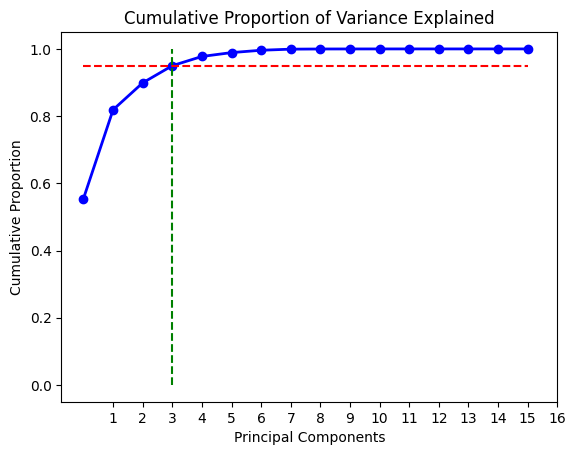

In [54]:
# ------------------------------------------------------------------------------------
# Step 1 — Proportion of Information (Explained Variance per Component)
# ------------------------------------------------------------------------------------
# Each eigenvalue λ_k represents the variance explained by the corresponding 
# principal component. To compare them on the same scale, we divide each eigenvalue 
# by the sum of all eigenvalues. This gives us the proportion of total variance 
# explained by each component.
#
# info_prop[k] = λ_k / Σ λ_i
info_prop = eigenvalues / eigenvalues.sum()

# Visualize this using a scree plot:
# - X-axis: Principal component index (1...n)
# - Y-axis: Proportion of variance explained by each component
plt.plot(np.arange(1, len(info_prop) + 1), info_prop, 'bo-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.xticks(np.arange(1, len(info_prop) + 1))
plt.ylabel('Proportion of Variance Explained')
plt.show()
plt.clf()

# ------------------------------------------------------------------------------------
# Step 2 — Cumulative Proportion of Information
# ------------------------------------------------------------------------------------
# To see how much information is retained by using the first k components, 
# we compute the cumulative sum of the explained variance proportions.
#
# cum_info_prop[k] = Σ (info_prop[i]) from i=1..k
cum_info_prop = np.cumsum(info_prop)

# Plot the cumulative variance explained:
# - The horizontal line at 0.95 indicates the 95% threshold.
# - The vertical line shows the smallest number of components needed to reach it.
plt.plot(cum_info_prop, 'bo-', linewidth=2)
plt.hlines(y=0.95, xmin=0, xmax=len(info_prop)-1, colors='red', linestyles='dashed')
plt.vlines(x=3, ymin=0, ymax=1, colors='green', linestyles='dashed')
plt.title('Cumulative Proportion of Variance Explained')
plt.xlabel('Principal Components')
plt.xticks(np.arange(1, len(info_prop) + 1))
plt.ylabel('Cumulative Proportion')
plt.show()

# ------------------------------------------------------------------------------------
# Explanation
# ------------------------------------------------------------------------------------
# - The scree plot shows that the first principal component alone explains ~50% 
#   of the variance, while the second explains ~30%. Each subsequent component 
#   contributes less.
# - The cumulative variance plot shows that by the time we include the first 
#   4 components, we already account for ~95% of the total variance.
# - This means dimensionality can be reduced from 16 features to just 4 principal 
#   components with minimal information loss.


# Implementing PCA using Scikit-Learn

Instead of manually performing PCA with NumPy, we can use the **scikit-learn** module `sklearn.decomposition.PCA`. This approach is simpler, more efficient, and includes additional options such as different solvers for computing the principal components.

---

**Step 1: Standardize the Data**

- PCA is sensitive to scale: features with larger magnitudes can dominate the variance.  
- Standardization ensures each feature contributes equally by subtracting the mean and dividing by the standard deviation:

$$
X_{\text{standardized}} = \frac{X - \mu}{\sigma}
$$

where \(\mu\) is the mean and \(\sigma\) is the standard deviation of each feature.

---

**Step 2: Apply PCA**

- Fit the standardized data with `PCA()` from scikit-learn.  
- The result includes:
  - **components\_**: the eigenvectors (principal axes).  
  - **explained_variance_ratio\_**: the relative variance explained by each component (proportional eigenvalues).  

---

**Step 3: Inspect Results**

- The **components** matrix shows how each principal component is constructed as a weighted combination of the original features.  
- The **variance ratios** indicate the percentage of information captured by each component.  

For example:  
- PC1 might explain ~50% of the variance,  
- PC2 another ~30%,  
- Together they capture ~80% of the dataset’s structure.

---

**Advantages of Scikit-Learn over NumPy**

- Multiple solvers available for better numerical stability and performance.  
- Provides direct access to explained variance ratios and principal components.  
- Integration with scikit-learn’s pipelines, making it easier to combine PCA with other machine learning models.  

---

**Key Takeaway**

Using `sklearn.decomposition.PCA` streamlines the PCA process:  
1. Standardize the data.  
2. Fit PCA.  
3. Examine the principal axes and variance explained.  

This method reduces implementation effort and ensures reliable, optimized results while maintaining flexibility for downstream machine learning tasks.


In [55]:
from sklearn.decomposition import PCA

In [56]:
# ------------------------------------------------------------------------------------
# Step 1 — Standardize the Data
# ------------------------------------------------------------------------------------
# PCA is sensitive to scale: features with larger numeric ranges can dominate.
# Standardization makes each feature have mean = 0 and std = 1.
mean = data_matrix.mean(axis=0)
sttd = data_matrix.std(axis=0)
data_matrix_standardized = (data_matrix - mean) / sttd
print(data_matrix_standardized.head())

# ------------------------------------------------------------------------------------
# Step 2 — Fit PCA and Extract Components
# ------------------------------------------------------------------------------------
# pca.fit() learns the eigenvectors ("principal axes") from the standardized data.
# pca.components_ has shape (n_components, n_features).
# - Each ROW corresponds to one principal component.
# - Each COLUMN corresponds to the weight of a given original feature.
pca = PCA()
components = pca.fit(data_matrix_standardized).components_
# For easier human interpretation, we want to flip the orientation so that
# each *original feature* becomes a row, and each *principal component* a column.
# This way we can directly see how each feature contributes to each component.
components = pd.DataFrame(components).transpose()
components.index = data_matrix.columns
print(components)

# ------------------------------------------------------------------------------------
# Step 3 — Explained Variance Ratios
# ------------------------------------------------------------------------------------
# explained_variance_ratio_ is a 1D array of length n_components.
# We wrap it in a DataFrame for readability. 
# We also use .transpose() here so that the ratios are displayed as a single row,
# instead of a single column stretching vertically.
var_ratio = pca.explained_variance_ratio_
# Transpose here is not mathematically necessary but is purely for DISPLAY: 
# it presents the 16 variance ratios side by side across columns, which makes it 
# easier to visually compare them (especially when printing).
var_ratio = pd.DataFrame(var_ratio).transpose()
print(var_ratio)

       Area  Perimeter  MajorAxisLength  MinorAxisLength  AspectRation  \
0 -0.840718  -1.143277        -1.306550        -0.631130     -1.564995   
1 -0.829157  -1.013887        -1.395860        -0.434429     -1.969712   
2 -0.807128  -1.078789        -1.252311        -0.585713     -1.514236   
3 -0.785712  -0.977179        -1.278778        -0.439274     -1.741554   
4 -0.781210  -1.097344        -1.380420        -0.266654     -2.117915   

   Eccentricity  ConvexArea  EquivDiameter    Extent  Solidity  roundness  \
0     -2.185640   -0.841420      -1.063302  0.289077  0.367600   1.423815   
1     -3.685904   -0.826071      -1.044178  0.697451 -0.462889   0.231046   
2     -2.045261   -0.808674      -1.008047  0.578174  0.518398   1.252819   
3     -2.742110   -0.773947      -0.973301  0.671235 -2.241685   0.515030   
4     -4.534862   -0.784257      -0.966044  0.476003  0.804743   1.874924   

   Compactness  ShapeFactor1  ShapeFactor2  ShapeFactor3  ShapeFactor4  
0     1.839049     

# Projecting the Data onto the Principal Axes

After computing PCA and obtaining the eigenvectors (principal axes), we can project our original data onto these new axes. This step reduces the dimensionality of the dataset while preserving most of its variance.

---

**How Projection Works**

- Projection is done by taking the **dot product** of the standardized data and the selected eigenvectors.  
- In scikit-learn, this is handled automatically by the `fit_transform()` method.  
- The result is a new dataset expressed in terms of principal components instead of the original features.

---

**Implementation Example**

1. Choose the number of principal components to keep (e.g., 3).  
2. Fit the PCA model and transform the standardized data.  
3. Store the result in a DataFrame and label the new columns `PC1`, `PC2`, `PC3`.  

The transformed dataset now contains new features that are linear combinations of the original variables.

---

**Visualizing the Results**

- By plotting the first two principal components (PC1 and PC2), we can visualize high-dimensional data in 2D space.  
- This often reveals natural clustering or separation between groups in the dataset.  
- If three components are kept, the data can be visualized in 3D space.  

Example: plotting PC1 vs PC2 for a penguin dataset shows clear groupings by species, indicating that PCA has captured meaningful structure in the data.

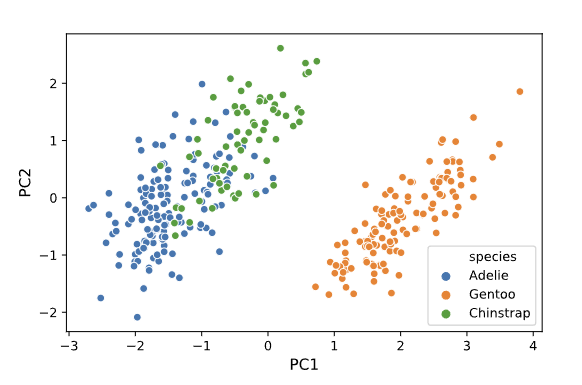

---

**Key Takeaway**

Projecting the dataset onto its principal axes reduces dimensionality and highlights structure.  
- The first few principal components usually explain the majority of variance.  
- Scatter plots of PC1 vs PC2 (and PC3 if needed) provide a simplified but powerful view of relationships and clustering within the data.


        PC1       PC2       PC3       PC4
0 -4.981378  1.824630 -0.748993 -0.390797
1 -5.436593  2.932257 -2.182294 -0.431944
2 -4.757913  1.826817 -0.514019 -0.125849
3 -4.300383  2.003587 -3.554316  0.082961
4 -6.349107  4.088055 -1.179156 -0.830327


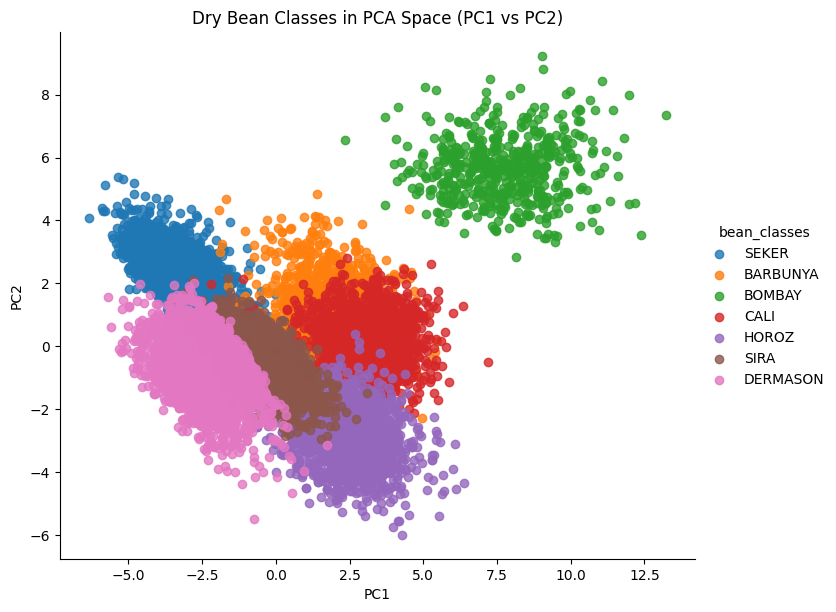

In [57]:
# ------------------------------------------------------------------------------------
# Step 1 — Transform Data with PCA (Keep 4 Components)
# ------------------------------------------------------------------------------------
# We select 4 principal components because earlier analysis showed they explain ~95% 
# of the total variance. Using fewer dimensions makes the data more compact while 
# retaining nearly all of the original information.
#
# pca.fit_transform() both:
#   - Fits the PCA model to the standardized data
#   - Projects the data onto the first 4 principal axes
pca = PCA(n_components=4)
data_pcomp = pca.fit_transform(data_matrix_standardized)

# Convert to DataFrame and label components
data_pcomp = pd.DataFrame(data_pcomp, columns=['PC1', 'PC2', 'PC3', 'PC4'])
print(data_pcomp.head())

# ------------------------------------------------------------------------------------
# Step 2 — Visualize Principal Components
# ------------------------------------------------------------------------------------
# Adding the class labels back allows us to see if PCA separates categories.
# Plotting PC1 vs PC2 is common because they usually capture the most variance.
data_pcomp['bean_classes'] = classes

sns.lmplot(
    x='PC1', 
    y='PC2', 
    data=data_pcomp, 
    hue='bean_classes',   # color points by bean class
    fit_reg=False,        # no regression line
    height=6, 
    aspect=1.2
)

plt.title("Dry Bean Classes in PCA Space (PC1 vs PC2)")
plt.show()

# ------------------------------------------------------------------------------------
# Explanation
# ------------------------------------------------------------------------------------
# - Each data point is projected into the space defined by the top 4 components.
# - PC1 and PC2 typically explain the majority of the variance, so plotting them 
#   shows how well the dataset separates in 2D.
# - If clusters appear in this scatter plot, it means PCA has successfully 
#   highlighted differences between classes (in this case, types of beans).

# PCA as Features

Up to this point, PCA has been used to calculate principal axes and project data onto them. The resulting components are new features that summarize most of the variance in the dataset. These principal components can be used in place of the original features for training machine learning models.

---

**Why Use PCA as Features?**

- **Dimensionality Reduction**: Instead of working with all original features (e.g., 16), we can keep only a few principal components (e.g., 4) that retain ~95% of the dataset’s variance.  
- **Faster Training**: With fewer dimensions, models train more quickly and require less computational power.  
- **Uncorrelated Features**: Principal components are constructed to be uncorrelated with each other, reducing redundancy and often improving performance of algorithms that assume independent features.  

---

**Example: Dry Bean Dataset**

- In the previous step, we found that the first **four principal components** already explain ~95% of the variance.  
- These four components can be used as inputs to a classifier instead of the full 16 original features.  
- By doing this, we significantly reduce dimensionality while preserving most of the information.

---

**Modeling with PCA Features**

- We will train a **Support Vector Classifier (SVC)** using the first four components as features.  
- For comparison, we also train the same model using all 16 original features.  
- Performance is evaluated using **average likelihood score**:  
  - Higher scores = better model fit.  
  - This allows us to see if dimensionality reduction improves, maintains, or hurts performance.  

---

**Key Takeaway**

Using PCA as features provides a compact, information-rich representation of the data.  
- It reduces dimensionality, speeds up training, and eliminates feature correlations.  
- In many cases, models trained on a handful of principal components can achieve nearly the same performance—or even outperform—models trained on the full dataset.


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

In [61]:
# We will use the classes as y
y = classes.astype('category').cat.codes
 
# Get principal components with 4 features and save as X
pca_1 = PCA(n_components=4) 
X = pca_1.fit_transform(data_matrix_standardized) 
 
# Split the data into 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_1 = LinearSVC(random_state=0, tol=1e-5)
svc_1.fit(X_train, y_train) 
 
# Generate a score for the testing data
score_1 = svc_1.score(X_test, y_test)
print(f'Score for model with 4 PCA features: {score_1}')
 
# Split the original data intro 33% testing and the rest training
X_train, X_test, y_train, y_test = train_test_split(data_matrix_standardized, y, test_size=0.33, random_state=42)
 
# Create a Linear Support Vector Classifier
svc_2 = LinearSVC(random_state=0)
svc_2.fit(X_train, y_train)
 
# Generate a score for the testing data
score_2 = svc_2.score(X_test, y_test)
print(f'Score for model with original features: {score_2}')


Score for model with 4 PCA features: 0.8472840605520926
Score for model with original features: 0.9171861086375779


**Why PCA Did Not Improve Model Performance**

In our experiment, the Support Vector Classifier (SVC) trained on the **original 16 standardized features** achieved a higher score than the model trained on the **4 principal components**. This may feel surprising, since PCA is often introduced as a way to improve model efficiency and sometimes performance. Let’s break down why this happened, and why in theory PCA can still be useful.

---

**Why It Didn’t Work Here**

1. **Loss of Information**  
   - PCA compressed 16 features into 4 components, retaining ~95% of the variance.  
   - The remaining ~5% of variance was discarded. While small, this missing variance may have contained class-relevant information that helped the classifier distinguish between bean types.  

2. **Variance ≠ Predictive Power**  
   - PCA maximizes variance, but features with low variance can still be important for classification.  
   - By ignoring these directions, PCA may reduce the classifier’s ability to leverage subtle but discriminative patterns.  

3. **SVM Handles the Original Features Well**  
   - With standardized features and only 16 dimensions, LinearSVC is not overwhelmed.  
   - There is no strong curse of dimensionality in this case, so dimensionality reduction provided little benefit.  
   - The model using all features could directly exploit correlations in the raw data that PCA transformed away.

---

**Why PCA Should Work in Theory**

1. **Noise Reduction**  
   - By compressing data into fewer dimensions, PCA filters out noise and redundancy, often leading to models that generalize better.  

2. **Uncorrelated Features**  
   - Principal components are orthogonal (uncorrelated), which can benefit algorithms sensitive to multicollinearity.  
   - In theory, this gives the classifier a "cleaner" feature space to operate in.  

3. **Efficiency and Scalability**  
   - In higher-dimensional datasets (hundreds or thousands of features), PCA greatly reduces computational cost.  
   - Models become faster to train and often perform better by focusing on the most informative directions.  

---

**Key Takeaway**

In this dataset, reducing from 16 to 4 features removed some useful information, so the PCA-based model underperformed. However, PCA remains valuable in situations where:  
- There are many more features, making computation expensive.  
- Features are highly correlated, creating redundancy.  
- Noise reduction improves generalization.  

Here, the dataset was already relatively small and manageable, so PCA offered no advantage — and in fact discarded some predictive detail.


# PCA for Images I

PCA can also be applied to image datasets, which makes its effects very intuitive to visualize. In this context, an image is represented as a **row in a data matrix**, with each pixel’s intensity treated as a separate feature.  

---

**How Images Work as Data**

- An image of size \(h \times w\) pixels can be “flattened” into a 1D vector of length \(h \times w\).  
- Each entry in the vector corresponds to the grayscale intensity of a pixel.  
- A dataset of \(n\) images can therefore be represented as a matrix of shape:  

$$
\text{Data Matrix Shape} = (n \times (h \cdot w))
$$

- Example: 400 face images of size 64×64 → a data matrix of shape (400 × 4096).

---

**Step 1: Standardize the Images**

- Just like with tabular data, we standardize image data to make each pixel comparable.  
- This involves centering (subtracting the mean) and scaling (dividing by the standard deviation).  
- Standardization ensures that PCA is driven by differences in image structure rather than raw pixel intensity scales.

---

**Step 2: Observe the Original Faces**

- Before applying PCA, we visualize a few images from the dataset.  
- This provides a baseline view: the original data in pixel space.  
- Each face image is essentially high-dimensional, containing thousands of features (pixels).  

---

**Looking Ahead**

In the next step, we will apply PCA to the Olivetti Faces dataset. By reconstructing the faces with only a subset of the principal components, we can see:  
- How much visual detail is retained with fewer components.  
- How PCA captures the most important variance in images (e.g., lighting, face shape) while discarding less critical details (e.g., noise).  

This visual demonstration helps us understand **how PCA reduces dimensionality while still keeping most of the meaningful information**.


In [62]:
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

Number of features (pixels) per image: 4096
Square image side length: 64


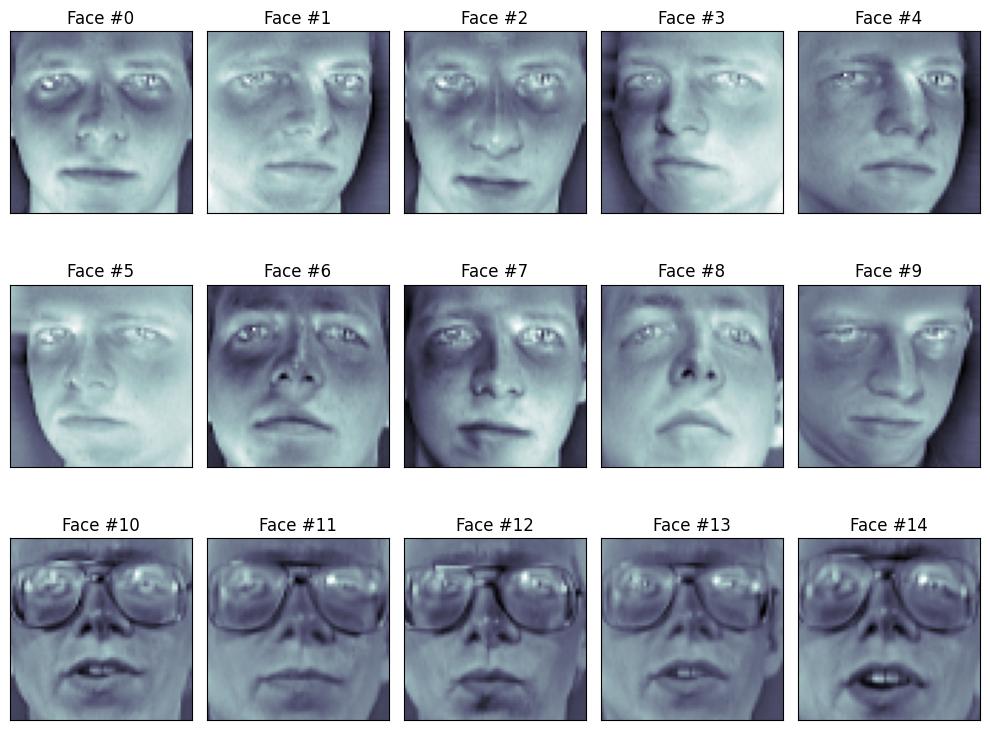

In [65]:
# ------------------------------------------------------------------------------------
# Step 1 — Download and Standardize Images
# ------------------------------------------------------------------------------------
# Each image is represented as a flattened vector of pixel intensities (values in [0,1]).
# Standardization ensures PCA later focuses on structural variation rather than brightness.
faces = datasets.fetch_olivetti_faces()['data']
faces_mean = faces.mean(axis=0)
faces_std = faces.std(axis=0)
faces_standardized = (faces - faces_mean) / faces_std

# ------------------------------------------------------------------------------------
# Step 2 — Find Image Dimensions
# ------------------------------------------------------------------------------------
# Each row = one image, each column = one pixel intensity.
# Images are square, so side length = sqrt(number of features).
n_images, n_features = faces_standardized.shape
side_length = int(np.sqrt(n_features))

print(f'Number of features (pixels) per image: {n_features}')
print(f'Square image side length: {side_length}')

# ------------------------------------------------------------------------------------
# Step 3 — Plot the First 15 Standardized Faces
# ------------------------------------------------------------------------------------
fig = plt.figure(figsize=(10, 8))

for i in range(15):
    # Create subplot grid: 3 rows x 5 columns
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Face #{i}')
    
    # Get flattened image from dataset
    face_image = faces_standardized[i]
    
    # Reshape 1D vector back into 2D square image
    face_image_reshaped = face_image.reshape(side_length, side_length)
    
    # Display using a grayscale colormap
    ax.imshow(face_image_reshaped, cmap=plt.cm.bone)

plt.tight_layout()
plt.show()

# PCA for Images II

With the Olivetti Faces dataset standardized, we can now apply PCA to extract the **eigenvalues** and **eigenvectors**. In the context of images, the eigenvectors are known as **eigenfaces**.  

---

**Eigenfaces**

- Eigenfaces are the principal components of the dataset in image form.  
- Each eigenface represents a “building block” of the facial images, capturing structural patterns such as lighting, orientation, or general face shape.  
- When combined in different proportions, eigenfaces reconstruct the original faces.  

By plotting the first few eigenfaces, we can see which features of the face are most important for representing variation in the dataset.

---

**Dimensionality Reduction and Reconstruction**

- Each original face image has thousands of pixels (features). For Olivetti, each image has 4096 pixels.  
- PCA allows us to compress this down to a much smaller set of principal components while retaining most of the information.  
- For example:  
  - Using 400 components instead of 4096 retains the essential facial structure.  
  - This represents only **0.9% of the original features**, yet the reconstructed faces remain recognizable.  

---

**Key Insight**

- PCA for images is not just a mathematical trick: it visually demonstrates how variance captures the most critical aspects of a dataset.  
- Eigenfaces highlight the directions of greatest variability across images, and reconstructed faces show how much information can be preserved even after aggressive dimensionality reduction.  
- This exercise demonstrates how PCA balances **data compression** with **information retention**, making it a powerful tool for computer vision and face recognition tasks.


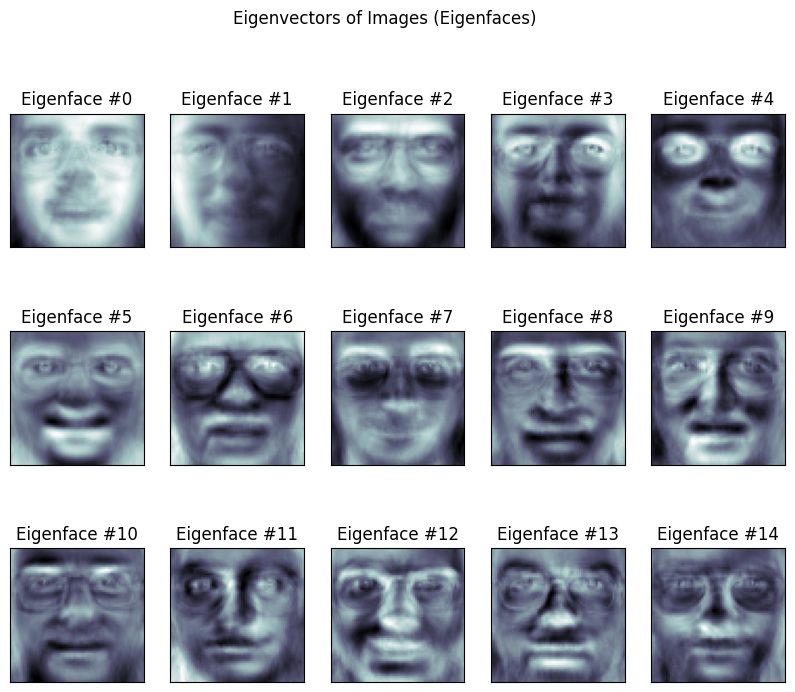

In [67]:
# ------------------------------------------------------------------------------------
# Step 1 — Visualize Eigenfaces
# ------------------------------------------------------------------------------------
# The eigenvectors (principal axes) can be reshaped into 64x64 to be visualized.
# These are called "eigenfaces" and they represent the main variations across all faces.
eigenfaces = pca.components_

fig = plt.figure(figsize=(10, 8))
fig.suptitle('Eigenvectors of Images (Eigenfaces)')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Eigenface #{i}')
    
    eigenface = eigenfaces[i].reshape(64, 64)
    ax.imshow(eigenface, cmap=plt.cm.bone)
plt.show()

**Eigenfaces**

When applying PCA to images, the eigenvectors of the covariance matrix can be reshaped into image form. These vectors are called **eigenfaces**.  

- Each eigenface represents a “direction of maximum variance” across the dataset of faces.  
- They are not full faces, but highlight the structural variations common across many faces, such as lighting patterns, general shape of the head, or positions of eyes and mouth.  
- Every face in the dataset can be approximated as a weighted sum of these eigenfaces.  

---

# ------------------------------------------------------------------------------------
# Step 2 — Fit PCA
# ------------------------------------------------------------------------------------
# We specify n_components=40. This means each face (4096 pixels) will now be
# compressed into only 40 numbers (principal components). 
# That's ~0.09% of the original features.
pca = PCA(n_components=40) 
pca.fit(faces_standardized)

# ------------------------------------------------------------------------------------
# Step 3 — Reconstruct Images
# ------------------------------------------------------------------------------------
# Transform the original faces into PCA space (compression).
principal_components = pca.transform(faces_standardized)

# Reconstruct images back into 4096-pixel space from compressed PCs.
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the first 15 reconstructed images.
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from 40 Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed #{i}')
    
    reconstructed_face = faces_reconstructed[i].reshape(64, 64)
    ax.imshow(reconstructed_face, cmap=plt.cm.bone)
plt.show()

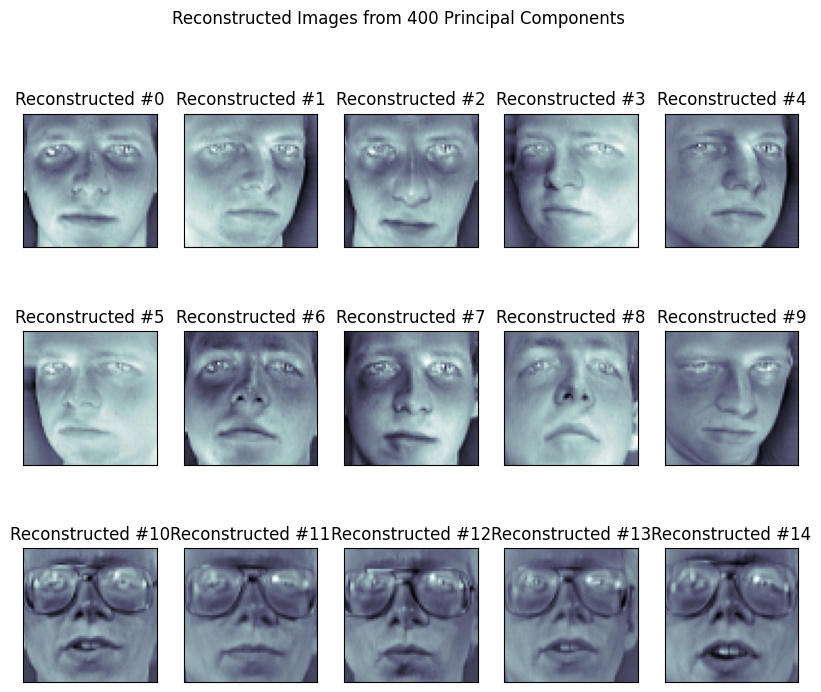

In [69]:
# ------------------------------------------------------------------------------------
# Step 4 — Fit PCA with 400 Components
# ------------------------------------------------------------------------------------
# We specify n_components=400. This means each face (4096 pixels) is now compressed
# into only 400 numbers (principal components). 
# That's ~0.9% of the original features, a tenfold increase compared to 40 PCs,
# which retains much more detail.
pca = PCA(n_components=400) 
pca.fit(faces_standardized)

# ------------------------------------------------------------------------------------
# Step 5 — Reconstruct Images
# ------------------------------------------------------------------------------------
# Transform the original faces into PCA space (compression).
principal_components = pca.transform(faces_standardized)

# Reconstruct images back into 4096-pixel space from compressed PCs.
faces_reconstructed = pca.inverse_transform(principal_components)

# Plot the first 15 reconstructed images.
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Reconstructed Images from 400 Principal Components')
for i in range(15):
    ax = fig.add_subplot(3, 5, i + 1, xticks=[], yticks=[])
    ax.set_title(f'Reconstructed #{i}')
    
    reconstructed_face = faces_reconstructed[i].reshape(64, 64)
    ax.imshow(reconstructed_face, cmap=plt.cm.bone)
plt.show()



**Fitting the Model with 40 vs 400 Features**

- **40 Components (~0.09% of original features):**  
  - The dataset is heavily compressed (from 4096 pixels to just 40 numbers per face).  
  - Reconstructed faces remain recognizable, but fine details are lost.  
  - Faces appear smoother, with less texture and definition.  
  - Useful when storage or computation is very limited, but not ideal for high-fidelity tasks.  

- **400 Components (~0.9% of original features):**  
  - Compression is less aggressive (from 4096 to 400 numbers).  
  - Reconstructed faces look nearly identical to the originals.  
  - Much more detail is preserved: shading, contours, and individual characteristics.  
  - Still a huge reduction in dimensionality while retaining almost all information.  

---

**Key Insight**

- Increasing the number of principal components increases the **fidelity** of the reconstruction, since more variance is captured.  
- Fewer components mean stronger compression, faster processing, and lower storage needs, but at the cost of detail and clarity.  
- The balance between **accuracy** and **efficiency** is the main trade-off when choosing how many eigenfaces to keep.  


**Key Takeaway**

PCA is a powerful method for simplifying datasets without losing much information. By projecting data onto principal components, we reduce redundancy, speed up algorithms, and sometimes even improve accuracy. Whether used for visualization, image compression, or as input features for machine learning models, PCA provides a balance between efficiency and information retention, making it an essential tool in the data scientist’s workflow.